# Clean tweets
### Clean the tweets and pickle them for future use

## Mount files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ## Import required libaries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
%matplotlib inline
sns.set()

## Load train and test data

In [3]:
#read files from the folder
path = '/content/drive/MyDrive/Guvi Files/Final Project2(Tweets)/'
train_tweets = pd.read_csv(path+'data/train.csv', sep=',')
test_tweets = pd.read_csv(path+'data/test.csv',sep=',')


## Explore data

In [4]:
train_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test_tweets.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
print (train_tweets.shape, test_tweets.shape)

(31962, 3) (17197, 2)


In [7]:
# ID columns in both train and test is of no use, we can drop them
train_tweets.drop('id', axis=1, inplace=True)
test_tweets.drop('id', axis=1, inplace=True)

## Check label/target distribution in the train dataset

In [8]:
train_tweets['label'].unique()

array([0, 1])

In [9]:
train_tweets['label'].value_counts()

,count
label,
0,29720
1,2242


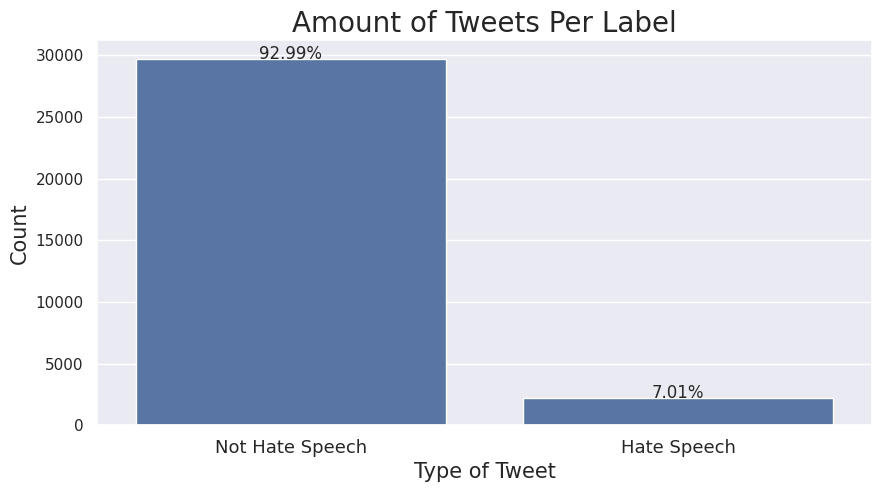

In [18]:
#matplot count plot
plt.figure(figsize=(10,5))
ax = sns.countplot(x='label', data=train_tweets)
ax.set_title('Amount of Tweets Per Label',fontsize = 20)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Not Hate Speech','Hate Speech'],fontsize = 13)

total = float(len(train_tweets)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center")
#save the chart
plt.savefig(path + 'visualisations/label_imbalance.png',bbox_inches = 'tight', pad_inches = .5)

### Only 7% of the data is hate speech. We may have to over-sample hate speech or under-sample OK speech before building a model

## Clean text
- Clean tweets in train and test, add to a new col in the same DF. Pickle and store for future use

In [27]:
#Clean function
def clean_text1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # make text lowercase
    text = text.lower()
    # removing text within brackets
    text = re.sub('\[.*?\]', '', text)
    # removing text within parentheses
    text = re.sub('\(.*?\)', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # removing &amp;
    text = re.sub('(\&amp\;)', '', text)
    # removing any usernames
    text = re.sub('(@[^\s]+)', '', text)
    # removing any hashtags
    text = re.sub('(#[^\s]+)', '', text)
    # remove `rt` for retweet
    text = re.sub('(rt)', '', text)
    # remove all punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # getting rid of `httptco`
    text = re.sub('(httptco)', '', text)
    # remove non ASCII characters
    text = ''.join([word for word in text if word in string.printable])

    return text

In [28]:
#appy clean text on train and test tweets
train_tweets['clean_tweet'] = train_tweets['tweet'].apply(lambda x: clean_text1(x))
test_tweets['clean_tweet'] = test_tweets['tweet'].apply(lambda x: clean_text1(x))

In [29]:
train_tweets.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they don...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,0,factsguide: society now #motivation,factsguide society now


In [35]:
# check whether non ASCII chars are removed
print(train_tweets['tweet'][3],'\n',train_tweets['clean_tweet'][3])

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   
  i love u take with u all the time in ur   


In [36]:
#pickle the df and store in drive for future reference
train_tweets.to_pickle(path+'data/train_tweets_clean.pkl')
test_tweets.to_pickle(path+'data/test_tweets_clean.pkl')